In [1]:
import os
import yaml
import copy
import time
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### ERA5

In [58]:
fn_stn = '/glade/campaign/ral/hap/ksha/EPRI_data/ERA5_daily/Yuma_PG_2000.zarr'
ds_stn = xr.open_zarr(fn_stn)
test_stn = ds_stn['PRECT'].values * 1000

In [63]:
fn_grid = '/glade/derecho/scratch/ksha/EPRI_data/ERA5_grid/Yuma_PG/ERA5_Yuma_PG_2000.zarr'
ds_grid = xr.open_zarr(fn_grid)
test_grid = ds_grid['total_precipitation'].isel(lat=10, lon=8).values * 1000

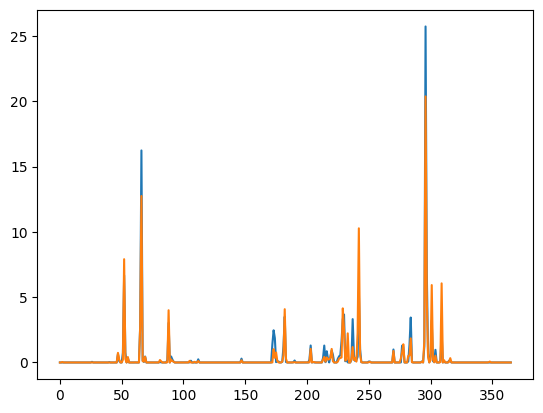

In [64]:
plt.plot(test_stn)
plt.plot(test_grid)

### CESM2

In [48]:
stn = 'Fort_Bragg'

fn_stn = f'/glade/campaign/ral/hap/ksha/EPRI_data/CESM_SMYLE_STN/{stn}_2000.zarr'
ds_stn = xr.open_zarr(fn_stn)
test_stn = ds_stn['PRECT'].values

fn_grid = f'/glade/derecho/scratch/ksha/EPRI_data/CESM2_SMYLE/{stn}/SMYLE_{stn}_2000.zarr'
ds_grid = xr.open_zarr(fn_grid).sel(time=slice(f'{2000+1}-01-01T00', f'{2000+10}-12-31T00'))

In [49]:
test_grid = ds_grid['PRECT'].isel(lat=10, lon=8).values

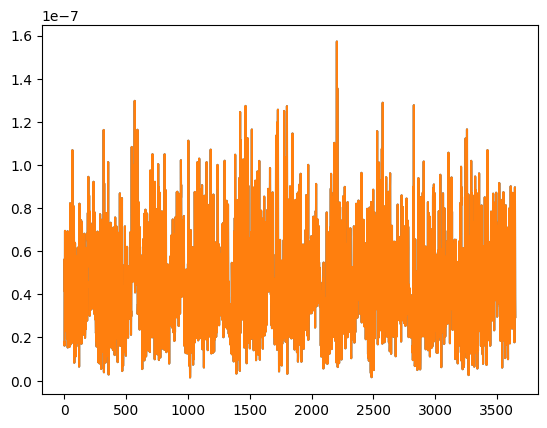

In [50]:
plt.plot(test_stn)
plt.plot(test_grid)

### Annual metrics

In [4]:
ds_grid = xr.open_zarr('/glade/derecho/scratch/ksha/EPRI_data/METRICS/Yuma_PG/ERA5_TP_max.zarr')
ds_stn = xr.open_zarr('/glade/derecho/scratch/ksha/EPRI_data/METRICS_STN/Yuma_PG/metrics.zarr')

In [5]:
test_grid = ds_grid['PRECT_max'].isel(lat=10, lon=8).values
test_stn = ds_stn['PRECT_max_default'].values

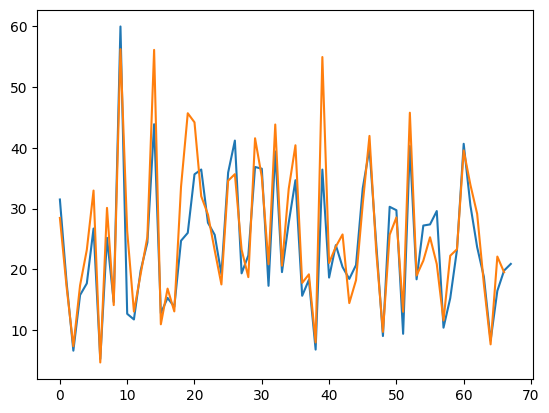

In [10]:
plt.plot(test_grid)
plt.plot(test_stn)

In [11]:
ds_grid = xr.open_zarr('/glade/derecho/scratch/ksha/EPRI_data/METRICS/Yuma_PG/CESM_TP_max.zarr')
ds_stn = xr.open_zarr('/glade/derecho/scratch/ksha/EPRI_data/METRICS_STN/Yuma_PG/CESM_metrics.zarr')

In [12]:
test_grid = ds_grid['PRECT_max'].isel(lat=10, lon=8).values
test_stn = ds_stn['PRECT_max_default'].values

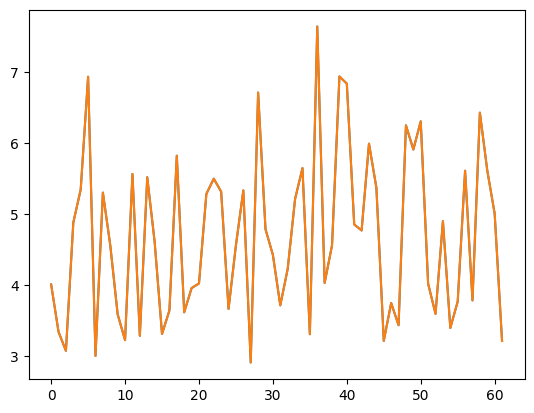

In [19]:
plt.plot(test_grid[:, 1])
plt.plot(test_stn[1, :])